##Practical Example of BPNN

credit: https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/

In [28]:
from random import seed
from random import random
import matplotlib.pyplot as plt
from math import exp
import numpy as np


In [29]:
 # Initialize a network, and randomly assign the weights
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights': [0.5, 0.3, 0.1]}]
	network.append(hidden_layer)
	output_layer = [{'weights': [0.6, 0.8]}, {'weights': [0.6, 0.8]}]
	network.append(output_layer)
 
	return network

In [30]:
#Forward propagation


# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return np.round(1.0 / (1.0 + exp(-activation)),2)

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

In [31]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [32]:
# Update network weights with error

def update_weights(network, row, l_rate, momentum):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i-1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j] + (momentum * l_rate * neuron['delta'] * inputs[j-1])
            neuron['weights'][-1] += l_rate * neuron['delta'] + (momentum * l_rate * neuron['delta'])

In [33]:
error_grp = []
iter_grp = []
def train_network(network,train,l_rate,n_epoch,n_outputs):
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate, 0.7)
        error_grp.append(sum_error)
        iter_grp.append(epoch+1)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

In [34]:
dataset = [[1,1,0],
           [1,0,1],
           [0,1,1],
           [0,0,0]]

In [35]:
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 1, n_outputs)
train_network(network, dataset, 0.5, 2, n_outputs)
for layer in network:
	print(layer)

>epoch=0, lrate=0.500, error=2.564
>epoch=1, lrate=0.500, error=2.449
[{'weights': [0.4616277339534911, 0.2620406743727892, 0.02231263152974374], 'output': 0.51, 'delta': -0.010513807486006124}]
[{'weights': [0.42241589200000007, 0.5153579500000001], 'output': 0.66, 'delta': 0.07629599999999999}, {'weights': [0.42761656600000003, 0.5141747500000001], 'output': 0.71, 'delta': -0.146189}]


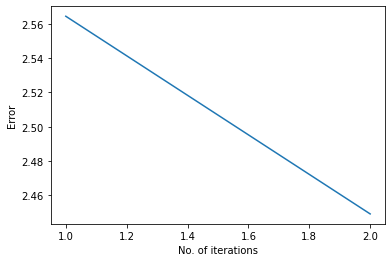

In [36]:
#Draw the graph
plt.plot(iter_grp, error_grp)
plt.ylabel('Error')
plt.xlabel('No. of iterations')
plt.show()
#plt.savefig('0.01.png')